# STEP 1 : EDA and Cleaning of the dataset 

1-  Data Overview

First we import pandas library and load our dataset

In [ ]:
import pandas as pd

# Load data
file_path = r"C:\Users\julie\Downloads\Diamonds\Diamonds\diamonds.csv"
diamonds_df = pd.read_csv(file_path)

# to disp the first rows
diamonds_df.head()



Important things : 

Unnamed: It appears there is an unnamed column, likely an index or unique identifier for each record. You might consider setting this column as the index or removing it if it's not necessary.


carat: This is the weight of the diamond

cut: The quality of the cut of the diamonds

color: Diamond color rating

clarity: This refers to the internal purity of the diamond

depth: The height of a diamond

price: The cost of each diamond

x, y, z: The dimensions of the diamond in millimeters.

2-Summary Statistics

In [46]:
#stats of datasrt
summary_stats = diamonds_df.describe()

# check missing values
missing_values = diamonds_df.isnull().sum()
s
summary_stats, missing_values


(         Unnamed: 0         carat         depth         table         price  \
 count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
 mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
 std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
 min        1.000000      0.200000     43.000000     43.000000    326.000000   
 25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
 50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
 75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
 max    53940.000000      5.010000     79.000000     95.000000  18823.000000   
 
                   x             y             z  
 count  53940.000000  53940.000000  53940.000000  
 mean       5.731157      5.734526      3.538734  
 std        1.121761      1.142135      0.705699  
 min        0.000000      0.000000      0.000000  
 25%        4.710000   

Findings : 
The dataset consists of 53,940 entries with no missing values.

    The carat weight ranges from 0.2 to 5.01, with an average of 0.798.
    
    Price varies significantly, ranging from 326 to 18,823, with a mean price of $3,933.
    
    The dimensions (x, y, z) have a few entries with zero values, which are likely errors.

Categorical Features:

    The dataset includes categorical features such as cut, color, and clarity.
    
    These features will need to be encoded numerically for clustering.
    

Potential Data Cleaning:

    Remove or fill erroneous zero values in the dimensions (x, y, z).

# Data Cleaning

First we will check the cases where z, y or z =0

In [48]:

zero_dim_values = diamonds_df[(diamonds_df['x'] == 0) | (diamonds_df['y'] == 0) | (diamonds_df['z'] == 0)]

# display rows with zero values
zero_dim_values




,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
2207,2208,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
2314,2315,1.01,Premium,H,I1,58.1,59.0,3167,6.66,6.60,0.0
4791,4792,1.10,Premium,G,SI2,63.0,59.0,3696,6.50,6.47,0.0
5471,5472,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
10167,10168,1.50,Good,G,I1,64.0,61.0,4731,7.15,7.04,0.0
11182,11183,1.07,Ideal,F,SI2,61.6,56.0,4954,0.00,6.62,0.0
11963,11964,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
13601,13602,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
15951,15952,1.14,Fair,G,VS1,57.5,67.0,6381,0.00,0.00,0.0
24394,24395,2.18,Premium,H,SI2,59.4,61.0,12631,8.49,8.45,0.0


We observe approximatly 20 row contains x, y , or z = 0

Its a problem because its impossible or the diamond doesnt exist



Then, we will delete these 20 rows (we can because there are more than 50000 rows so 20 represents nothing in our dataset

In [5]:
# remove rows with zero dimensions
diamonds_cleaned_df = diamonds_df[(diamonds_df['x'] != 0) & (diamonds_df['y'] != 0) & (diamonds_df['z'] != 0)]

# vrify the removal
cleaned_count = diamonds_cleaned_df.shape[0]
cleaned_count


53920

Now we have 53920 rows

Previously, we also said that unamed column was useless so we delete it 

In [49]:
diamonds_cleaned_df= diamonds_cleaned_df.drop(columns=['Unnamed: 0'])

diamonds_cleaned_df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z,cut_encoded,color_encoded,clarity_encoded
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,2,1,3
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,3,1,2
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,1,1,4
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,3,5,5
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,1,6,3


Now our dataset is clean

Then , we plot the distrivution of ariables 

C:\Users\julie\anaconda1\envs\notebook-6.3.0\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\julie\anaconda1\envs\notebook-6.3.0\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


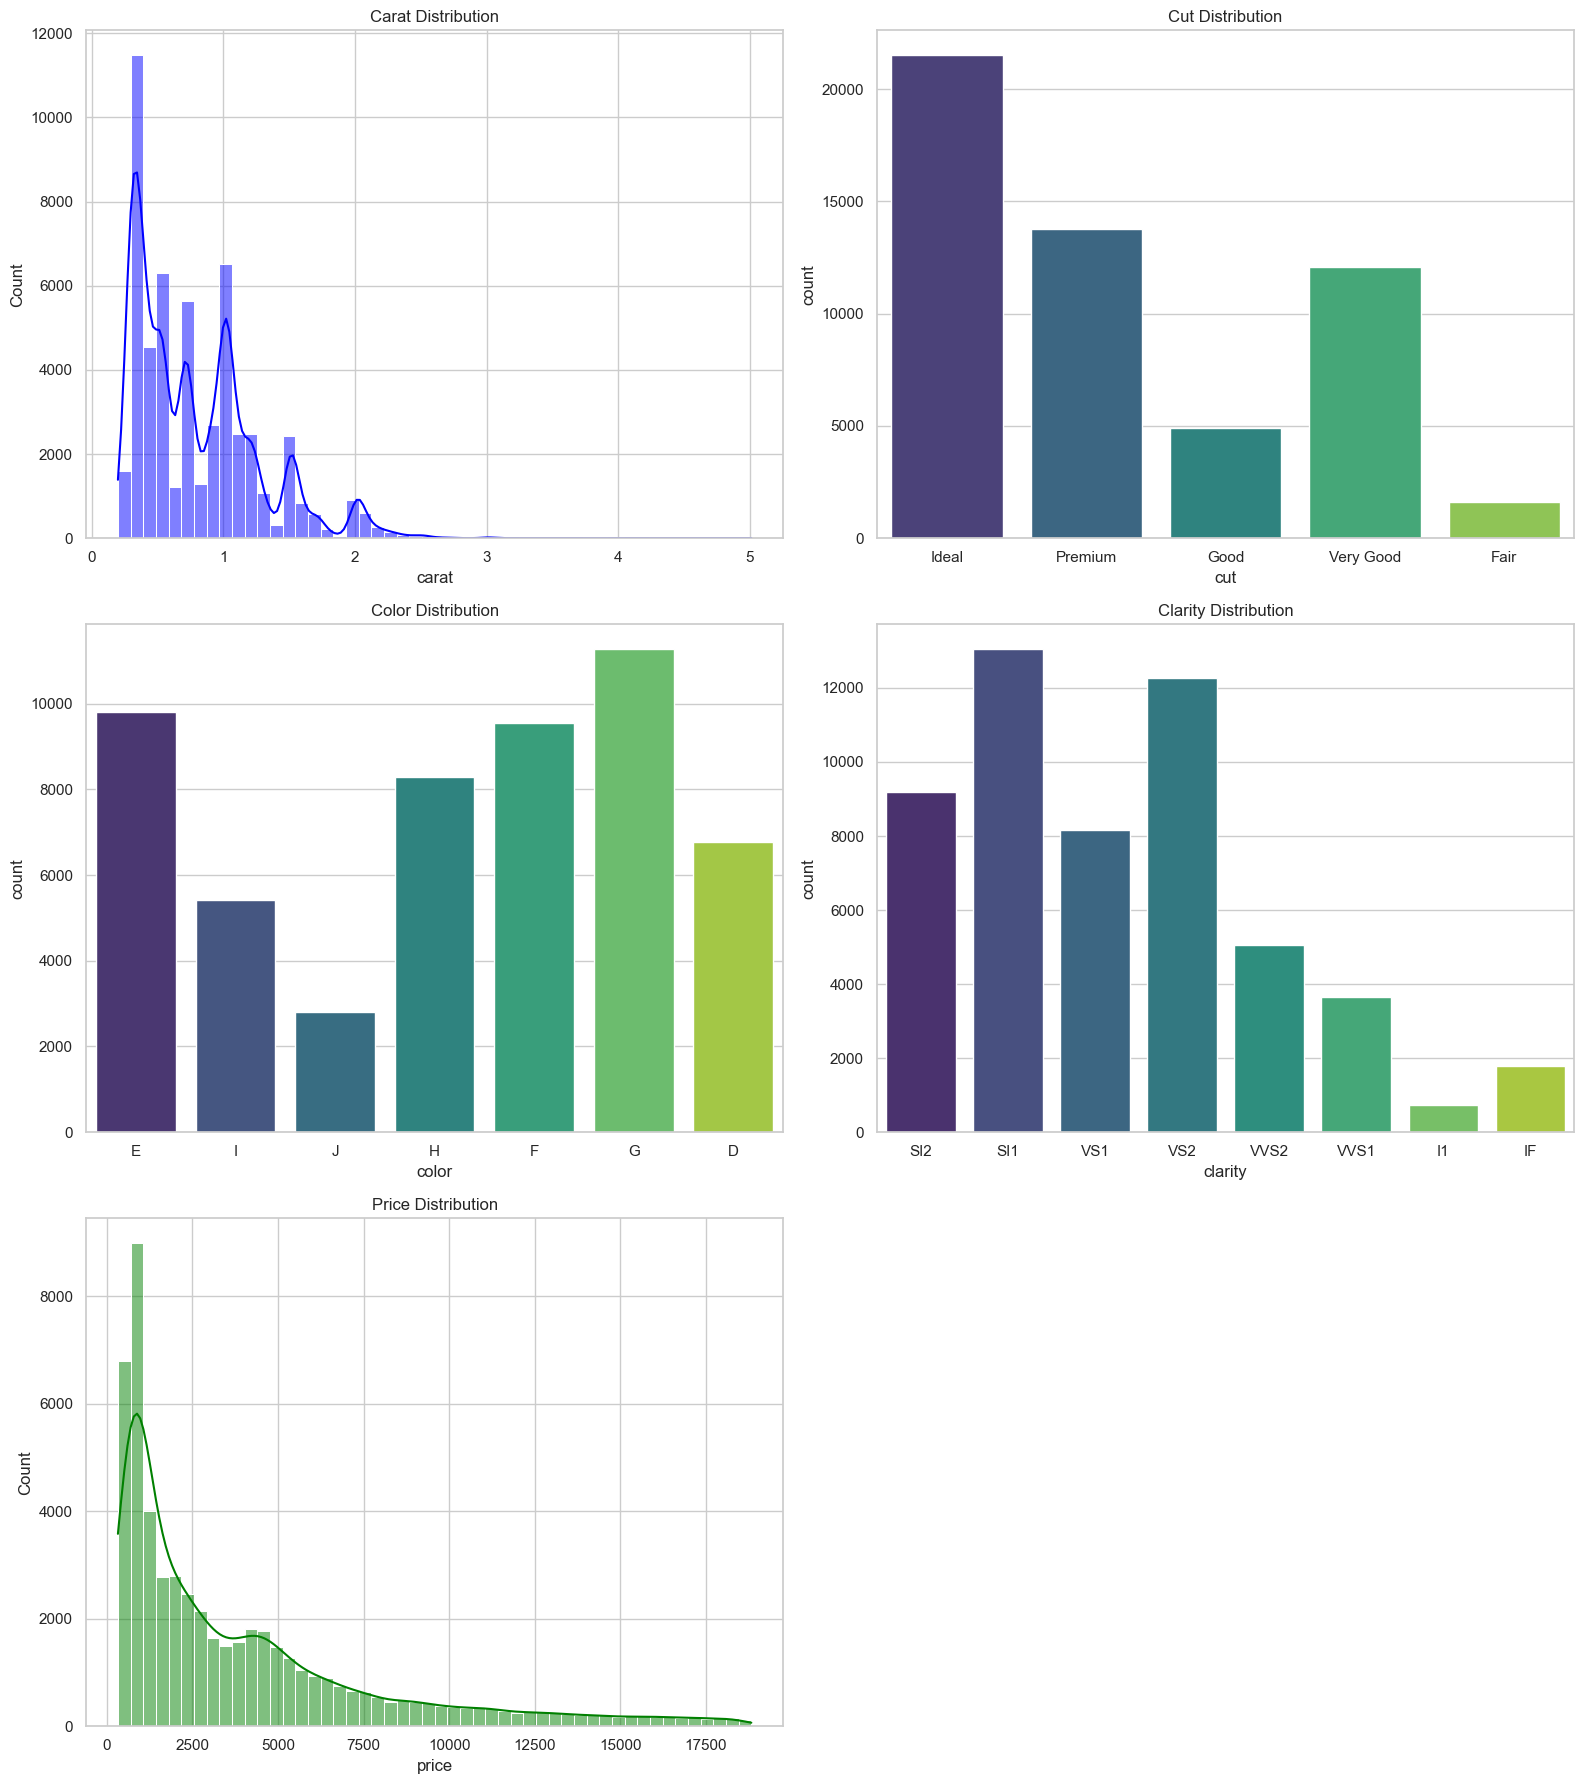

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


fig, axes = plt.subplots(3, 2, figsize=(16, 18))

# Carat distribution
sns.histplot(diamonds_cleaned_df['carat'], bins=50, kde=True, ax=axes[0, 0], color="blue")
axes[0, 0].set_title('Carat Distribution')

# Cut distribution
sns.countplot(x='cut', data=diamonds_cleaned_df, ax=axes[0, 1], palette="viridis")
axes[0, 1].set_title('Cut Distribution')

# Color distribution
sns.countplot(x='color', data=diamonds_cleaned_df, ax=axes[1, 0], palette="viridis")
axes[1, 0].set_title('Color Distribution')

# Clarity distribution
sns.countplot(x='clarity', data=diamonds_cleaned_df, ax=axes[1, 1], palette="viridis")
axes[1, 1].set_title('Clarity Distribution')

# Price distribution
sns.histplot(diamonds_cleaned_df['price'], bins=50, kde=True, ax=axes[2, 0], color="green")
axes[2, 0].set_title('Price Distribution')

fig.delaxes(axes[2, 1])

plt.tight_layout()
plt.show()


Carat Distribution

    Observation: The distribution of carat size shows a high frequency of smaller diamonds, with a peak around 0.3 to 0.5 carats. The frequency decreases significantly as carat size increases.
    -->This suggests that smaller diamonds are far more common in the market or at least within this dataset. Larger diamonds above 2 carats are significantly rarer.

Cut Distribution

    Observation: The most common cut grade in the dataset is Ideal, followed by Premium and Very Good 
    -->This indicates a preference or prevalence for higher-quality cuts in the dataset.

Color distribution

    Observation: The distribution across color grades shows that G, F, and H colors are the most common
  

Clarity Distribution

    Observation: The clarity grades SI1 and VS2 are the most frequent, with a decent number of diamonds classified as SI2 and VS1. 

Price Distribution

    Observation: The price histogram shows a right-skewed distribution with a significant peak at lower prices

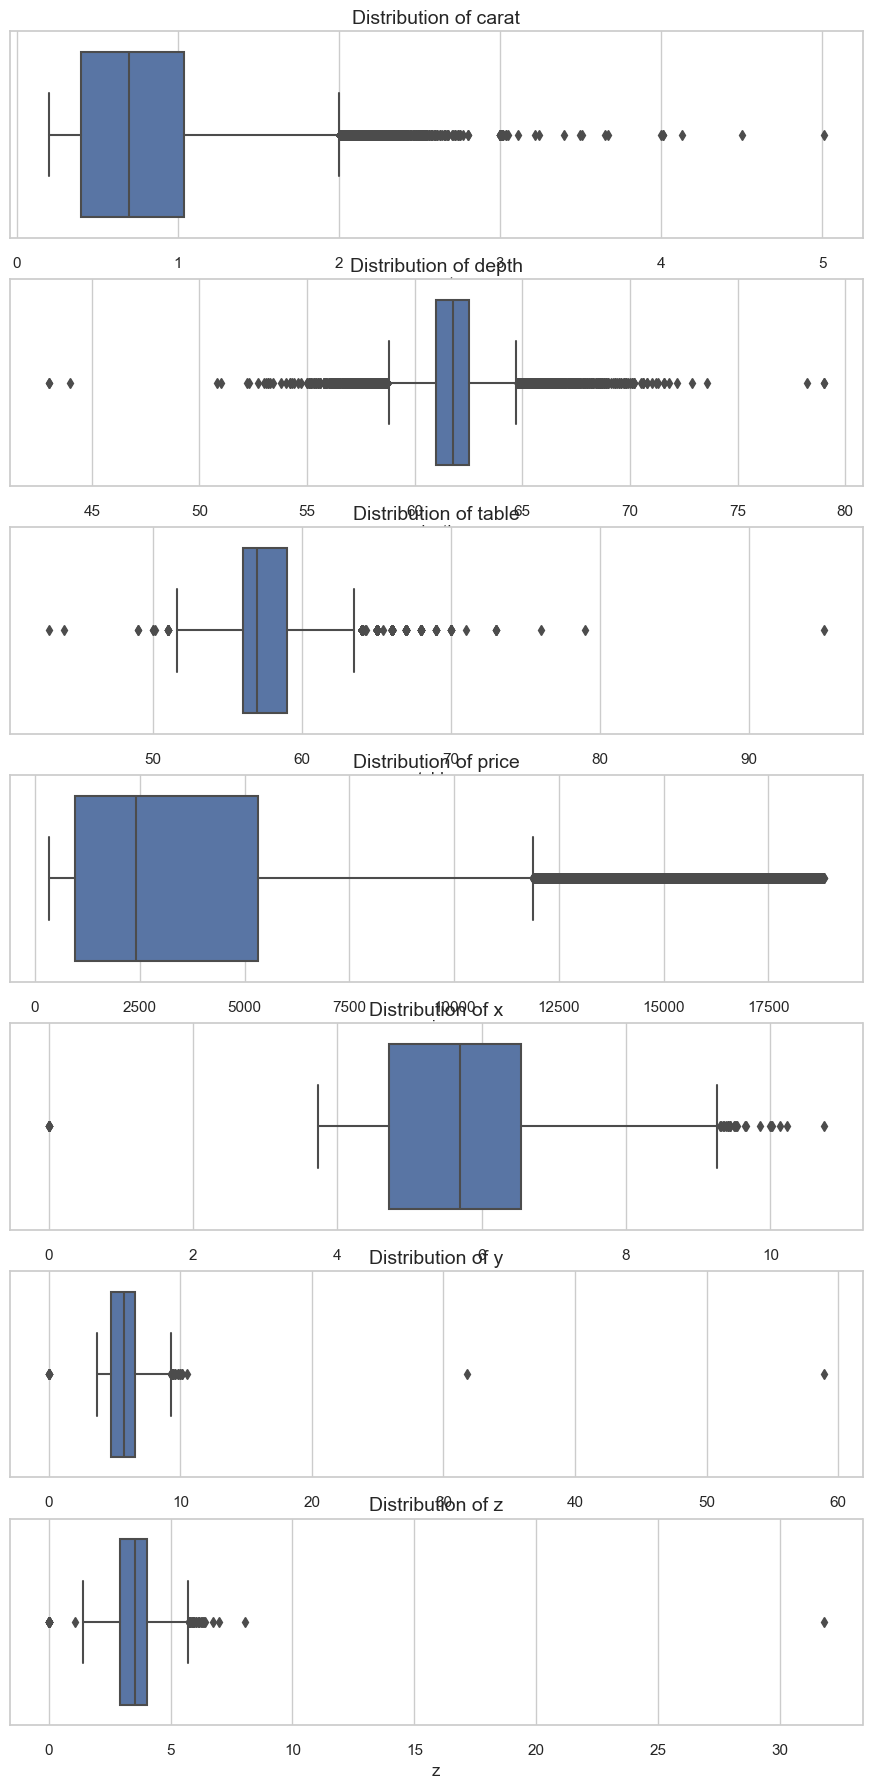

In [52]:
numerical_vars = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
sns.set(style="whitegrid")

# Création d'un boxplot pour chaque variable numérique
fig, ax = plt.subplots(len(numerical_vars), 1, figsize=(11, 22))

for i, var in enumerate(numerical_vars):
    sns.boxplot(x=diamonds_df[var], ax=ax[i])
    ax[i].set_title(f'Distribution of {var}', fontsize=14)
    ax[i].set_xlabel(f'{var}', fontsize=12)

Observation: 

carat : The majority of diamonds are clustered around lower carat values, with a median near 0.5 carats. There are outliers extending towards higher carat values, indicating some much larger diamonds.

Depth :  a compact distribution with a few outliers, most values are tightly grouped around the median, suggesting consistent cutting practices.

table : the table percentage shows a tight distribution with a few outliers. 

Price shows a highly skewed distribution with a significant concentration of diamonds in the lower price range, and outliers extend to very high prices.

x,y,z  dimensions of diamonds show distributions that are mostly compact but with some extreme outliers

We will now proceed to encode the categorical features (cut, color, clarity) numerically and apply the K-means clustering algorithm to uncover the clustering patterns among diamonds. 




We will also normalize : This practice involves adjusting the scale of variables so that they are on a comparable level
(sometimes variables in a dataset can have very different scales)


In [68]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

#encode categorical features
label_encoder = LabelEncoder()
diamonds_cleaned_df['cut_encoded'] = label_encoder.fit_transform(diamonds_cleaned_df['cut'])
diamonds_cleaned_df['color_encoded'] = label_encoder.fit_transform(diamonds_cleaned_df['color'])
diamonds_cleaned_df['clarity_encoded'] = label_encoder.fit_transform(diamonds_cleaned_df['clarity'])

# select features for clustering
features = diamonds_cleaned_df[['carat', 'cut_encoded', 'color_encoded', 'clarity_encoded', 'depth', 'table', 'price', 'x', 'y', 'z']]

# standardize the features
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)

#display the first few rows of the scaled features
scaled_features[:5]

array([[6.23700624e-03, 5.00000000e-01, 1.66666667e-01, 4.28571429e-01,
        5.13888889e-01, 2.30769231e-01, 0.00000000e+00, 3.13837375e-02,
        5.43281420e-03, 4.42564269e-02],
       [2.07900208e-03, 7.50000000e-01, 1.66666667e-01, 2.85714286e-01,
        4.66666667e-01, 3.46153846e-01, 0.00000000e+00, 2.28245364e-02,
        2.89750091e-03, 4.03514481e-02],
       [6.23700624e-03, 2.50000000e-01, 1.66666667e-01, 5.71428571e-01,
        3.86111111e-01, 4.23076923e-01, 5.40628210e-05, 4.56490728e-02,
        7.06265846e-03, 4.03514481e-02],
       [1.87110187e-02, 7.50000000e-01, 8.33333333e-01, 7.14285714e-01,
        5.38888889e-01, 2.88461538e-01, 4.32502568e-04, 6.70470756e-02,
        9.96015936e-03, 5.07647250e-02],
       [2.28690229e-02, 2.50000000e-01, 1.00000000e+00, 4.28571429e-01,
        5.63888889e-01, 2.88461538e-01, 4.86565389e-04, 8.70185449e-02,
        1.21332850e-02, 5.46697039e-02]])

the categorical features (cut, color, clarity) have been encoded, and all selected features have been standardized. We are now ready to apply the K-means clustering algorithm.

# STEP 2 :Train test Split 

In [69]:
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

We split our dataset in test and train (30% for the test)

In [70]:
# Séparation des données en ensembles d'entraînement et de test
X_train, X_test = train_test_split(scaled_features, test_size=0.3, random_state=42)


# STEP 3 : Building and training our model and optimization pf hyperparameters

First we will use elbow method to determine the optimal value of k and 

Moreover i wanted to test Knee locator from kneed libraru to see if it gives good value of k parameter

Optimal number of clusters determined by KneeLocator: 4


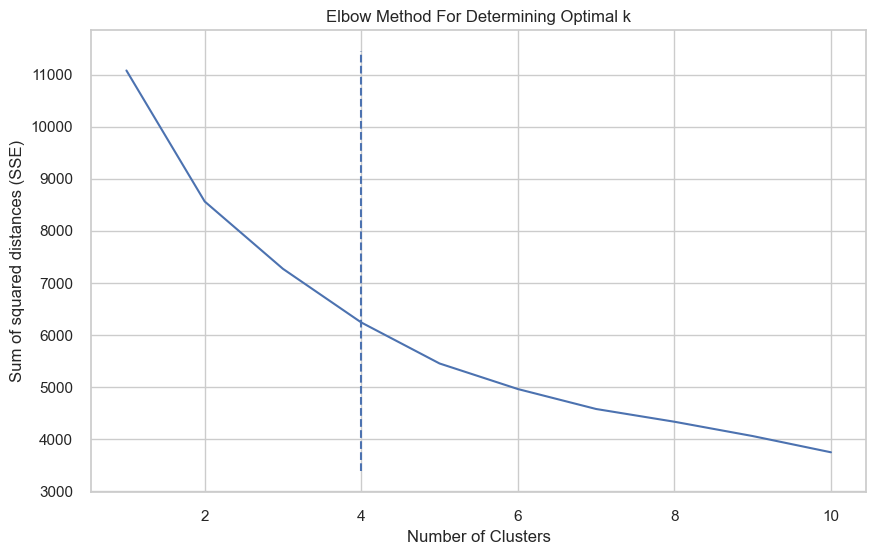

KMeans(n_clusters=4, random_state=42)

In [86]:
from kneed import KneeLocator

# Ccalcul of error
sse = []
range_clusters = range(1, 11)
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_train)
    sse.append(kmeans.inertia_)

# knee locator ttest
kl = KneeLocator(range_clusters, sse, curve="convex", direction="decreasing")
optimal_k = kl.elbow
print("Optimal number of clusters determined by KneeLocator:", optimal_k)

# elbow method
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, sse, 'bx-')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of squared distances (SSE)')
plt.title('Elbow Method For Determining Optimal k')
plt.vlines(optimal_k, plt.ylim()[0], plt.ylim()[1], linestyles='dashed')
plt.show()

# kmeans with optiaml number of clustrer
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(X_train)


According to KneeLocator, the optimal value of k, its the first value we will try
(we will use pca for dimensianality reduction )


-->According to me, visually, the best parameters would be k=2 or k=3


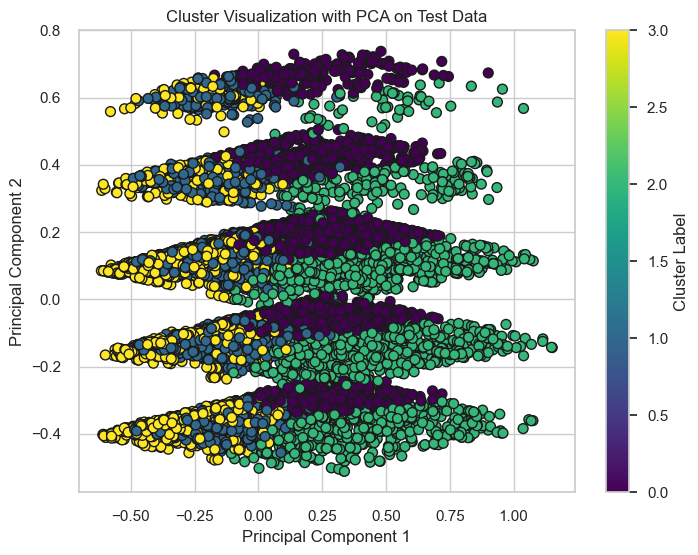

Silhouette Score for the test set: 0.201


In [78]:

#PCA for dimensionality reduction on test data
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# predicting cluster labels on test data
test_labels = kmeans.predict(X_test)

# visualizing the clusters on test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels, cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization with PCA on Test Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

from sklearn.metrics import silhouette_score
silhouette = silhouette_score(X_test, test_labels)

print(f"Silhouette Score for the test set: {silhouette:.3f}")


Cluster Separation:

    The PCA visualization shows of distinct clusters, but there is noticeable overlap between them.
    -->The clusters are relatively well sseparated in some areas but appear to be elongated and mixed in others.

Cluster Density:

    There are dense regions where points from different clusters are very close to each other, indicating that the clusters are not very well-defined.


silhouette Score: A score of 0.201 indicates that the clusters are not very well-defined. Here’s a breakdown of what this means:

    Positive Score: Since the score is positive, it indicates that points are, on average, closer to their own cluster centroid than to other clusters
     However, a score close to 0.2 suggests that the clustering is not very strong, with significant overlap between clusters.

C:\Users\julie\anaconda1\envs\notebook-6.3.0\lib\site-packages\sklearn\model_selection\_search.py:1051: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan]
  warnings.warn(


Best parameters found by GridSearchCV: {'max_iter': 300, 'n_init': 10}


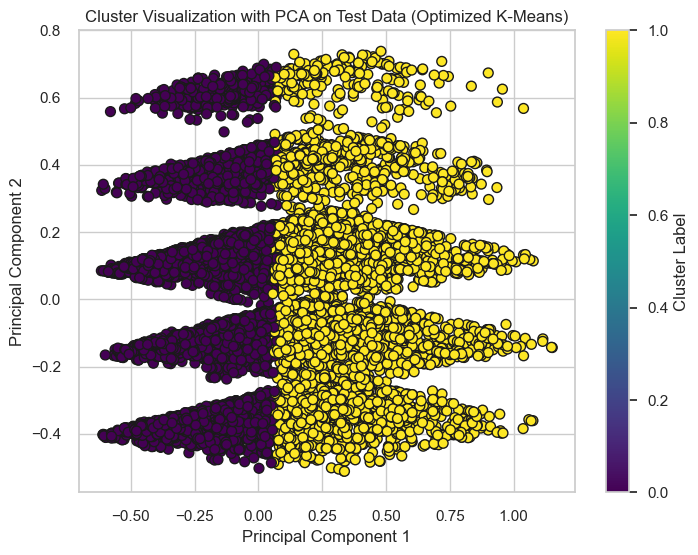

Silhouette Score for the test set with optimized K-Means: 0.231


In [93]:
# Custom silhouette score function for GridSearchCV
def silhouette_scorer(estimator, X):
    cluster_labels = estimator.fit_predict(X)
    return silhouette_score(X, cluster_labels)

# Hyperparameter optimization using GridSearchCV
param_grid = {
    'n_init': [10, 20, 30],
    'max_iter': [300, 500, 700]
}
kmeans = KMeans(n_clusters=2, random_state=42)
grid_search = GridSearchCV(kmeans, param_grid, cv=3, scoring=make_scorer(silhouette_scorer), n_jobs=-1)
grid_search.fit(X_train)

# Best parameters from grid search
best_params = grid_search.best_params_
print("Best parameters found by GridSearchCV:", best_params)
# Training the final K-Means model with optimal parameters
kmeans_optimized = KMeans(n_clusters=2, n_init=best_params['n_init'], max_iter=best_params['max_iter'], random_state=42)
kmeans_optimized.fit(X_train)

# Predicting cluster labels for the test set using the optimized model
test_labels_optimized = kmeans_optimized.predict(X_test)


pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

# Visualizing the clusters formed on test data
plt.figure(figsize=(8, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels_optimized, cmap='viridis', edgecolor='k', s=50)
plt.title('Cluster Visualization with PCA on Test Data (Optimized K-Means)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster Label')
plt.show()

# Calculate the Silhouette Score for the test set
silhouette_optimized = silhouette_score(X_test, test_labels_optimized)
print(f"Silhouette Score for the test set with optimized K-Means: {silhouette_optimized:.3f}")


The PCA visualization shows two distinct clusters (0 and 1) as indicated by the colors yellow and purple.
There is a noticeable separation between the two clusters, suggesting that K-Means has been able to distinguish between these two groups.
both clusters have dense regions, but there is still some overlap between them. This overlap indicates that while the clusters are distinguishable, there is not a perfect separation.


Moreover the hyperparameter optimization has a little bit improved our results but not much

The Silhouette Score is 0.230 which is quite better from the previous with k=4